Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import random

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



# statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

Control variable to use or not to use feature chocolate in modelling

Why? Because it is too strong for predicting and casts a shadow on remaining features.

In [2]:
use_chocolate = False

# Read data

In [3]:
current_directory = os.getcwd()
file_name = "candy-data.csv"
file_path = os.path.join(current_directory, file_name)

In [4]:
pd_candy = pd.read_csv(file_path)
pd_candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


Small dataset, no need for memory saving.

# Data sanity check

All collumns have no missings.

In [5]:
pd_candy.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Boxplot values

In [6]:
pd_candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


Show data types

In [7]:
pd_candy.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

Have a look for unique values (dataset is small, so it is plausible)

In [8]:
# Get the unique values in the current column
for column in pd_candy.drop(['competitorname','winpercent'], axis=1).columns:

    unique_values = pd_candy[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print('-----------------------------------------------')

Unique values in column 'chocolate':
[1 0]
-----------------------------------------------
Unique values in column 'fruity':
[0 1]
-----------------------------------------------
Unique values in column 'caramel':
[1 0]
-----------------------------------------------
Unique values in column 'peanutyalmondy':
[0 1]
-----------------------------------------------
Unique values in column 'nougat':
[0 1]
-----------------------------------------------
Unique values in column 'crispedricewafer':
[1 0]
-----------------------------------------------
Unique values in column 'hard':
[0 1]
-----------------------------------------------
Unique values in column 'bar':
[1 0]
-----------------------------------------------
Unique values in column 'pluribus':
[0 1]
-----------------------------------------------
Unique values in column 'sugarpercent':
[0.73199999 0.60399997 0.011      0.90600002 0.465      0.31299999
 0.046      0.127      0.43000001 0.093      0.197      0.22
 0.26699999 0.8249999

Select only numeric columns.

In [9]:
# Get the list of column names
column_names = pd_candy.columns.tolist()

# Drop all character columns
pd_candy_num = pd_candy.drop(columns=[column_name for column_name in column_names if pd_candy[column_name].dtype == 'object'])
pd_candy_num.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

### Create new fields based on others

Create gummies field to test if it is good idea to create gummies product.

In [10]:
pd_candy['gummies'] = pd_candy.apply(lambda row: 1
                                             if row['hard'] == 0 and
                                             row['bar'] == 0 and
                                             row['crispedricewafer'] == 0 and
                                             row['pluribus'] == 1 and
                                             row['peanutyalmondy'] == 0 and
                                             row['chocolate'] == 0 and
                                             row['competitorname'] != 'Pixie Sticks'
                                             else 0, axis=1)
pd_candy_num['gummies'] = pd_candy['gummies']
pd_candy_num['gummies'].sum()

22

In [11]:
# candies explored and checked via web
pd_candy[pd_candy['gummies']==1].head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,gummies
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,1
11,Chewey Lemonhead Fruit Mix,0,1,0,0,0,0,0,0,1,0.732,0.511,36.017628,1
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988,1
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076,1
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924,1


Create cookie field to test if it is good idea to create cookie product.

In [12]:
# This is the best definition we could get for cookies
# it is almost the same as 'bar' - be cautious!

pd_candy['cookie'] = pd_candy.apply(lambda row: 1
                                             if row['crispedricewafer'] == 1 or
                                             row['bar']
                                             else 0, axis=1)
pd_candy_num['cookie'] = pd_candy['cookie']
pd_candy['cookie'].sum()

22

In [13]:
# candies explored and checked via web
pd_candy[pd_candy['cookie']==1].head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,gummies,cookie
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,1
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,0,1
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,0,1
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037,0,1


#### Boxplots

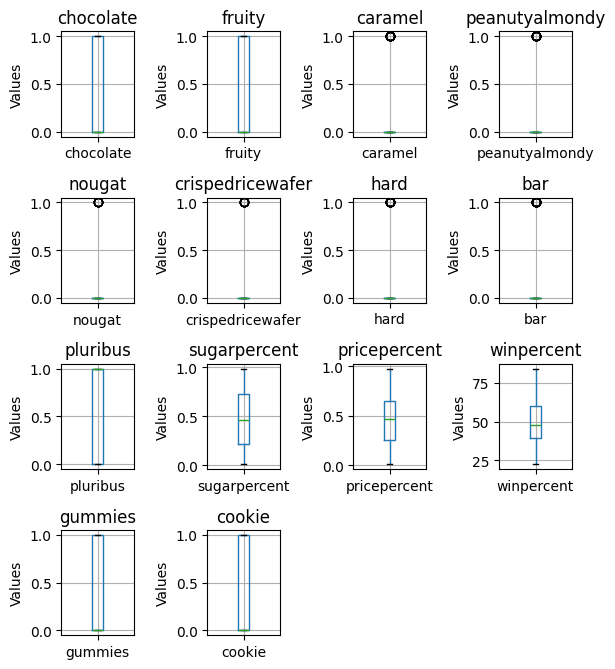

In [14]:
def draw_boxplot(df, n_col=2):
    # set up
    numerical_columns = df.select_dtypes(include=['float', 'int']).columns
    num_rows = (len(numerical_columns) + (n_col-1)) // n_col
    fig, axs = plt.subplots(nrows=num_rows, ncols=n_col, figsize=(6, 1.7 * num_rows))

    # draw boxplots
    non_empty_columns = [col for col in numerical_columns if len(df[col].dropna()) > 0]
    num_non_empty = len(non_empty_columns)

    for i, column in enumerate(non_empty_columns):
        row = i // n_col
        col = i % n_col
        df.boxplot(column=column, ax=axs[row, col])
        axs[row, col].set_title(f'{column}')
        axs[row, col].set_ylabel('Values')

    # Remove empty subplots
    if num_non_empty < num_rows * n_col:
        for j in range(num_non_empty, num_rows * n_col):
            fig.delaxes(axs[j // n_col, j % n_col])

    plt.tight_layout()
    plt.show()

draw_boxplot(pd_candy_num, n_col=4)

#### Histograms

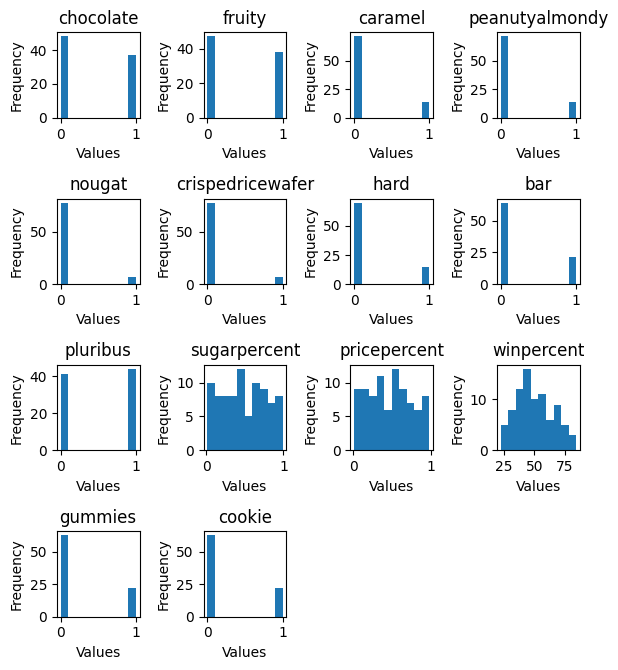

In [15]:
def draw_histogram(df, n_col=2):
    # set up
    numerical_columns = df.select_dtypes(include=['float', 'int']).columns
    num_rows = (len(numerical_columns) + (n_col-1)) // n_col
    fig, axs = plt.subplots(nrows=num_rows, ncols=n_col, figsize=(6, 1.7 * num_rows))

    # draw histograms
    non_empty_columns = [col for col in numerical_columns if len(df[col].dropna()) > 0]
    num_non_empty = len(non_empty_columns)

    for i, column in enumerate(non_empty_columns):
        row = i // n_col
        col = i % n_col
        axs[row, col].hist(df[column], bins=10)
        axs[row, col].set_title(f'{column}')
        axs[row, col].set_xlabel('Values')
        axs[row, col].set_ylabel('Frequency')

    # Remove empty subplots
    if num_non_empty < num_rows * n_col:
        for j in range(num_non_empty, num_rows * n_col):
            fig.delaxes(axs[j // n_col, j % n_col])

    plt.tight_layout()
    plt.show()

draw_histogram(pd_candy_num, n_col=4)

#### Scatter plots

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


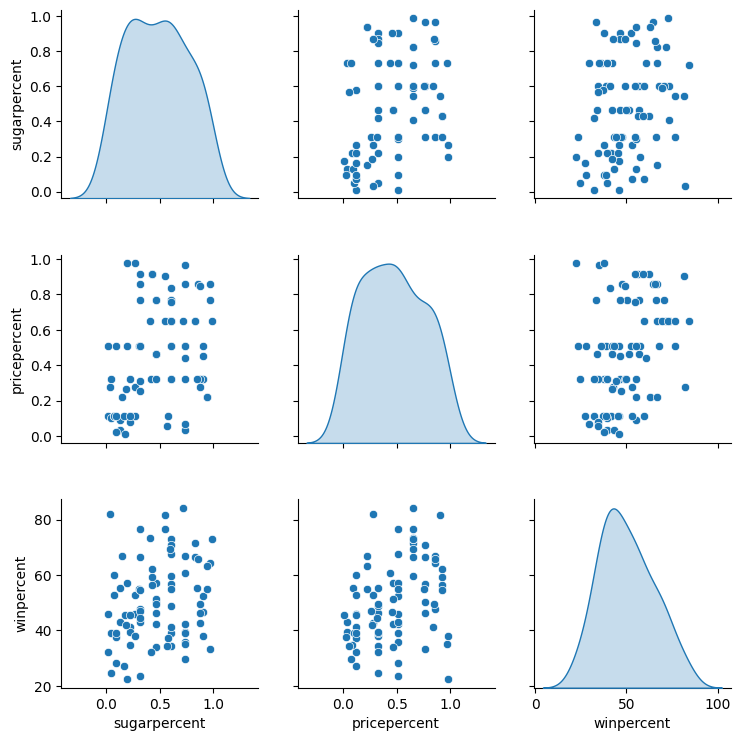

In [16]:
# draw scatter plots for continuos variables
def draw_scatter(df, n_cols=3, target='winpercent'):
    sns.pairplot(df, vars=df.columns, y_vars=target, diag_kind='kde', height=2.5, aspect=(df.shape[1]-1)/n_cols)
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.show()

draw_scatter(pd_candy_num[['sugarpercent', 'pricepercent', 'winpercent']], n_cols=2, target='winpercent')

Select only binary columns

In [17]:
# Select only the binnary columns
selected_columns = pd_candy_num.columns[((pd_candy_num == 1) | (pd_candy_num == 0)).all()]

# Create a new DataFrame with only the selected columns
pd_candy_bin = pd_candy_num[selected_columns]
pd_candy_bin.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'gummies', 'cookie'],
      dtype='object')

Distribution of ones in each columns

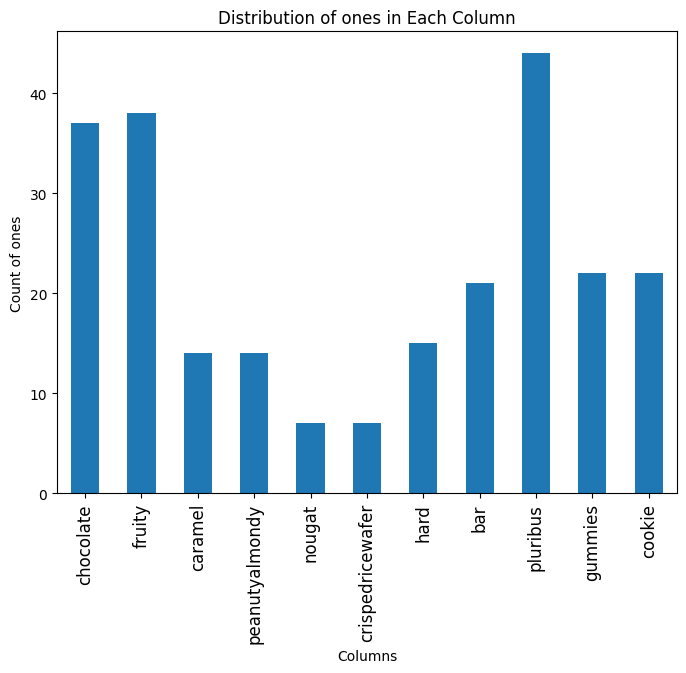

In [18]:
# Bar plot to show the distribution of 0s and 1s in each column
def plot_bar_distribution(df):
    plt.figure(figsize=(8, 6))
    df.sum().plot(kind='bar')
    plt.title('Distribution of ones in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Count of ones')
    plt.xticks(fontsize=12)
    plt.show()

# Create the plots
plot_bar_distribution(pd_candy_bin)

#### Correlation heatmap

In [19]:
pd_candy_num.corr()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,gummies,cookie
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517,-0.518825,0.618894
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938,0.495125,-0.531354
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416,-0.189990,0.316933
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192,-0.262407,0.244516
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375,-0.177028,0.506945
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680,-0.177028,0.506945
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382,-0.273551,-0.273551
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929,-0.338502,0.969345
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448,0.570436,-0.558420
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151,0.010393,0.136044


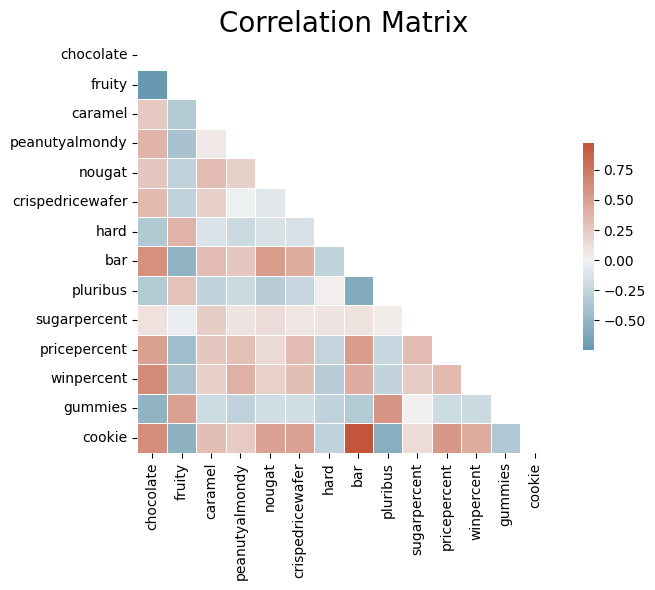

In [20]:
# Heatmap to show the correlation between the columns
def plot_heatmap(df):
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix', fontsize=20)
    plt.tight_layout()
    plt.show()

plot_heatmap(pd_candy_num)

First select significant fields  (used library sklearn).
Selected number of features was determined by a set of experiments. If p-value was greater then 0.05, then the feature was considered as insignificant. Then only 4 fields are remaining.

In [21]:
# show number of problematic columns
corr_matrix = pd_candy_num.corr()
corr_matrix_TF = np.abs(corr_matrix) <= 0.75
row_indices, col_indices = np.where(~corr_matrix_TF)

bad_var = []
for row, col in zip(row_indices, col_indices):
    if row == col:
        continue
    bad_var.append(row)
    print(f"Corellation detected: ({row}, {col})")
bad_var = list(set(bad_var))
bad_var.sort()

# if it is empty, tell me
if not bad_var:
    print("No correlation detected.")

Corellation detected: (7, 13)
Corellation detected: (13, 7)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


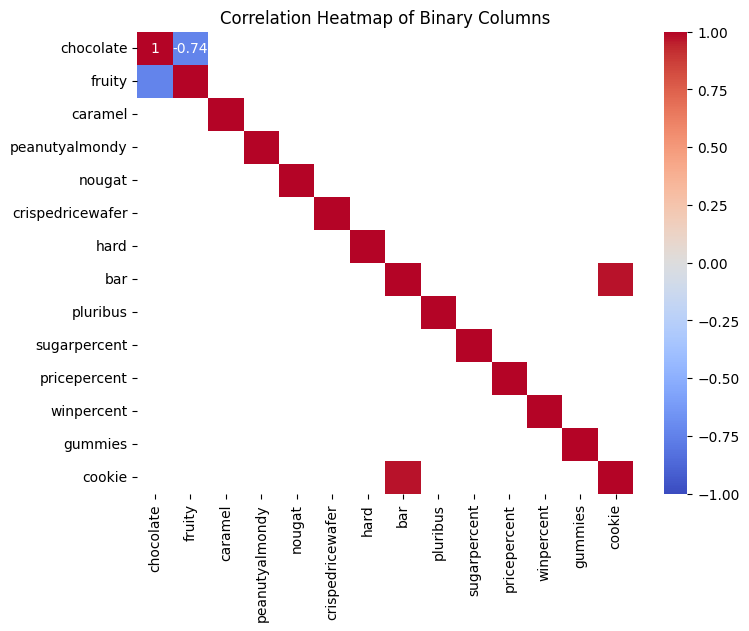

In [22]:
# Heatmap to show the high correlation between the columns
def plot_heatmap_high_corr(df, threshold=0.70):
    corr_matrix = df.corr()
    mask = abs(corr_matrix) < threshold
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                mask=mask.values, vmin=-1, vmax=1)
    
    plt.title('Correlation Heatmap of Binary Columns')
    plt.show()

plot_heatmap_high_corr(pd_candy_num, threshold=0.7)

Multicolinearity

* is present between bar and cookie variable.

* Potencial problems for chocholate and fruity. After consideration chocolate is a better predictor and fruity is removed from analysis.

In [23]:
pd_candy_num = pd_candy_num.drop(['bar','fruity'],axis=1)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


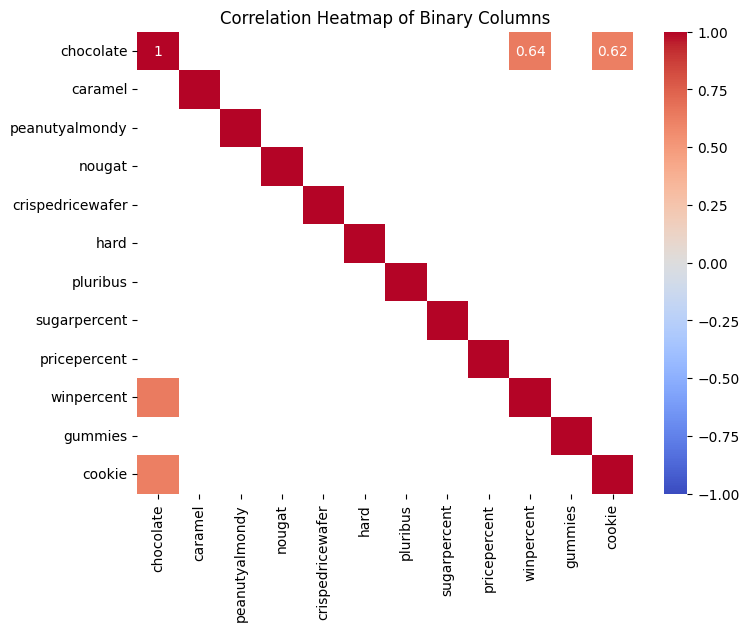

In [24]:
# more strict look, should be alright
plot_heatmap_high_corr(pd_candy_num, threshold=0.60)

VIF factor for detecting multicolinearity

In [25]:
# Calculate VIF for features in a DataFrame
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

def check_multicollinearity(vif_results, threshold=5):
    multicollinear_features = vif_results[vif_results['VIF'] >= threshold]['Feature'].tolist()
    return multicollinear_features

# Calculate VIF for features in a DataFrame
vif_results = calculate_vif(pd_candy_num)
# Check for multicollinearity
multicollinear_features = check_multicollinearity(vif_results, threshold=10)

print(vif_results)
print('----------------------------------')

if multicollinear_features:
    print("Potencial Multicollinearity detected for features:")
    print(multicollinear_features)
else:
    print("No multicollinearity detected.")

             Feature        VIF
0          chocolate   6.834787
1            caramel   1.576764
2     peanutyalmondy   1.670908
3             nougat   2.160447
4   crispedricewafer   2.030908
5               hard   2.119188
6           pluribus   4.293465
7       sugarpercent   5.225518
8       pricepercent   6.458623
9         winpercent  10.768020
10           gummies   4.220094
11            cookie   5.700807
----------------------------------
Potencial Multicollinearity detected for features:
['winpercent']


Winpercent looks a bit correlated by VIF factor. I decided to keep it even though it has a high VIF factor.

Since it is target variable, we can't work without that. Need to preprocess data, that could help!

However, interpretation is lost after scaling, therefore the feature is kept as it is and divided, so the value is between 0 and 1. 

# Preprocessing data

In [26]:
# not_scaled = True

winpercent target field

* (Values are greater then 1 -> let's do it this way for replication purpose.) -> not performed in the final script.
* Values greater then one are divided my 100.

In [27]:
# if not_scaled:
#     columns_to_scale = pd_candy_num.columns[pd_candy_num.max() > 1]

#     # Initialize the MinMaxScaler
#     scaler = MinMaxScaler()
#     print('scaled performed')
#     not_scaled = False

#     # Scale the identified columns
#     pd_candy_num[columns_to_scale] = scaler.fit_transform(pd_candy_num[columns_to_scale])
# else:
#     print('scaled not performed')
# pd_candy_num[columns_to_scale].describe()

columns_to_scale = pd_candy_num.columns[pd_candy_num.max() > 1]
pd_candy_num[columns_to_scale] = pd_candy_num[columns_to_scale]/100

In [28]:
# try drop chocolate - now better
vif_results = calculate_vif(pd_candy_num.drop(['chocolate'], axis=1))
multicollinear_features = check_multicollinearity(vif_results, threshold=8)
print(vif_results)
print('----------------------------------')

if multicollinear_features:
    print("Potencial Multicollinearity detected for features:")
    print(multicollinear_features)
else:
    print("No multicollinearity detected.")

             Feature       VIF
0            caramel  1.576646
1     peanutyalmondy  1.670595
2             nougat  2.133512
3   crispedricewafer  2.013415
4               hard  1.599726
5           pluribus  3.915661
6       sugarpercent  5.215278
7       pricepercent  6.350580
8         winpercent  7.352926
9            gummies  2.492104
10            cookie  5.043252
----------------------------------
No multicollinearity detected.


This shows that removing chocolate removes potential multicollinearity.

In [29]:
if use_chocolate:
    X = pd_candy_num.drop(['winpercent'], axis=1)
else:
    X = pd_candy_num.drop(['winpercent','chocolate'], axis=1)
y = pd_candy_num['winpercent']

# Linear regression - exploration

Set of trials was performed to determine the best number of features (=4) with significant impact.

In [30]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)  # Number determined by a set of experiments

rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
X_selected = rfe.transform(X)
X_selected = pd.DataFrame(X_selected, columns=selected_features)
X_selected

,peanutyalmondy,crispedricewafer,hard,sugarpercent
0,0.0,1.0,0.0,0.732
1,0.0,0.0,0.0,0.604
2,0.0,0.0,0.0,0.011
3,0.0,0.0,0.0,0.011
4,0.0,0.0,0.0,0.906
...,...,...,...,...
80,0.0,0.0,0.0,0.220
81,0.0,0.0,1.0,0.093
82,0.0,0.0,0.0,0.313
83,0.0,0.0,1.0,0.186


Now perform the Linear Regression (OLS) (used library statsmodels)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
X_train_with_const = sm.add_constant(X_train)

# Create and fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     8.213
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           2.14e-05
Time:                        20:07:14   Log-Likelihood:                 48.229
No. Observations:                  68   AIC:                            -86.46
Df Residuals:                      63   BIC:                            -75.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4268      0.032  

In [32]:
# Extract metrics for OLS
mse = round(results.mse_resid, 4)
r_squared = round(results.rsquared, 3)
aic = round(results.aic, 1)
bic = round(results.bic, 1)
f_statistic = round(results.fvalue, 3)

# Print the extracted metrics
print(f"MSE: {mse}")
print(f"R-squared (R^2): {r_squared}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"F-statistic: {f_statistic}")

MSE: 0.0153
R-squared (R^2): 0.343
AIC: -86.5
BIC: -75.4
F-statistic: 8.213


Model explains 34 % of variability if chocolate is not present in the dataset.

# Lasso regresion

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# alphas to test
alphas = [0.1, 0.05, 0.01]

best_features = []
second_best_features = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefficients = lasso_model.coef_
    importance = abs(coefficients)
    sorted_importance = importance.argsort()[::-1]

    # Print the feature importance scores and corresponding feature names
    print(f"\nBest Feature (Alpha={alpha}):")
    for i in sorted_importance[:3]:
        print(f"{X.columns[i]}: {importance[i]}")

    print("\nNext Best Feature (Alpha={alpha}):")
    for i in sorted_importance[3:5]:
        print(f"{X.columns[i]}: {importance[i]}")
    print('---------------------------------------------')

    # Store the best and second-best features for the current alpha
    best_features.append(X.columns[sorted_importance[:1]])
    second_best_features.append(X.columns[sorted_importance[1:4]])


Best Feature (Alpha=0.1):
cookie: 0.0
gummies: 0.0
pricepercent: 0.0

Next Best Feature (Alpha={alpha}):
sugarpercent: 0.0
pluribus: 0.0
---------------------------------------------

Best Feature (Alpha=0.05):
cookie: 0.0
gummies: 0.0
pricepercent: 0.0

Next Best Feature (Alpha={alpha}):
sugarpercent: 0.0
pluribus: 0.0
---------------------------------------------

Best Feature (Alpha=0.01):
cookie: 0.10493674892352144
peanutyalmondy: 0.051444930971945954
pluribus: 0.004174971442203331

Next Best Feature (Alpha={alpha}):
hard: 0.002555333929288584
gummies: 0.0
---------------------------------------------


In [34]:
# Print the best and second-best features for each alpha
print("\nBest Features for each Alpha:")
for alpha, features in zip(alphas, best_features):
    print(f"Alpha={alpha}: {features}")

print("\nNext Best Features for each Alpha:")
for alpha, features in zip(alphas, second_best_features):
    print(f"Alpha={alpha}: {features}")


Best Features for each Alpha:
Alpha=0.1: Index(['cookie'], dtype='object')
Alpha=0.05: Index(['cookie'], dtype='object')
Alpha=0.01: Index(['cookie'], dtype='object')

Next Best Features for each Alpha:
Alpha=0.1: Index(['gummies', 'pricepercent', 'sugarpercent'], dtype='object')
Alpha=0.05: Index(['gummies', 'pricepercent', 'sugarpercent'], dtype='object')
Alpha=0.01: Index(['peanutyalmondy', 'pluribus', 'hard'], dtype='object')


# Final model to present

In [35]:
# X_sel = pd_candy_num[['chocolate', 'peanutyalmondy', 'sugarpercent', 'pricepercent']]

if use_chocolate:
    X_sel = pd_candy_num[['chocolate', 'peanutyalmondy', 'sugarpercent', 'gummies', 'cookie']]
else:
    X_sel = pd_candy_num[['peanutyalmondy', 'sugarpercent', 'gummies', 'cookie', 'hard']]

In [36]:
X_sel_const = sm.add_constant(X_sel)

# Create and fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_sel_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     8.407
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           2.06e-06
Time:                        20:07:14   Log-Likelihood:                 60.914
No. Observations:                  85   AIC:                            -109.8
Df Residuals:                      79   BIC:                            -95.17
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4484      0.032     14.

In [37]:
# Extract metrics for OLS
mse = round(results.mse_resid, 4)
r_squared = round(results.rsquared, 3)
aic = round(results.aic, 1)
bic = round(results.bic, 1)
f_statistic = round(results.fvalue, 3)

# Print the extracted metrics
print(f"MSE: {mse}")
print(f"R-squared (R^2): {r_squared}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"F-statistic: {f_statistic}")

MSE: 0.015
R-squared (R^2): 0.347
AIC: -109.8
BIC: -95.2
F-statistic: 8.407


Test homoskedasticity

In [38]:
# Perform the Breusch-Pagan test
results = model.fit()
residuals = results.resid
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)

print(bp_test)

(14.127016001355603, 0.014822408844430321, 3.149392620828382, 0.012087150751339973)


heteroskedasticity: Sugar, cookies - not good (patterns or trends in the variability of the errors)

homoskedasticity: peanutyalmondy, gummies - ok

In [39]:
X_sel_const = sm.add_constant(X_sel)

# Create and fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_sel_const)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     10.02
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.87e-07
Time:                        20:07:14   Log-Likelihood:                 60.914
No. Observations:                  85   AIC:                            -109.8
Df Residuals:                      79   BIC:                            -95.17
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4484      0.032     13.

# Random Forrest

In [40]:
# split data for training

equality = ['cookie','gummies']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X[equality])

Need to tune parametrs first.

In [41]:
# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [20, 30, 50],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3]
}

# Create a random forest regressor
rf = RandomForestRegressor()

# Perform grid search for hyperparameter tuning
random.seed(50)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
print("Best Model Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 20}
Best Model Score: 0.10593785920185336


Let's perform Random tree on the dataset.

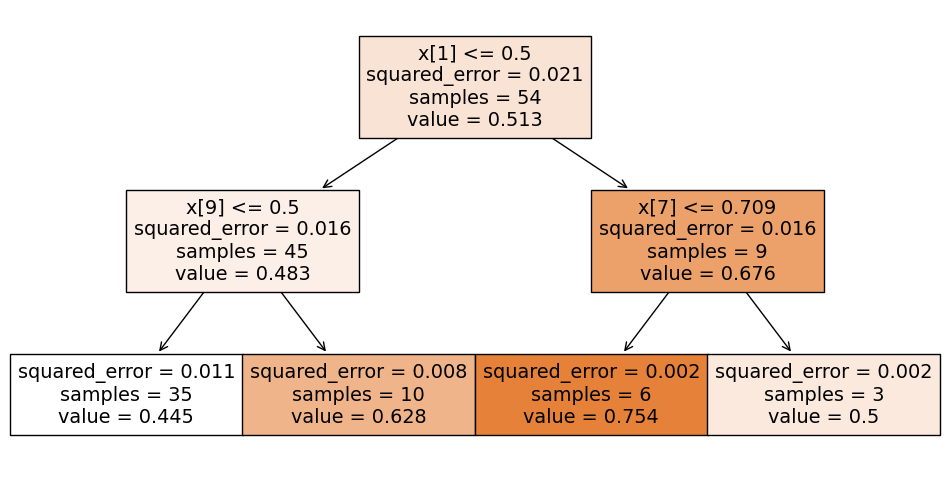

In [42]:
# Initialize the random forest model - no train, test split
rf_model = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                                max_depth = best_params['max_depth'],
                                min_samples_split = best_params['min_samples_split'],
                                min_samples_leaf = best_params['min_samples_leaf'],
                                random_state = 42)

# Train the model on the data
rf_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plt.title("Decision Tree")
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [43]:
num_columns = len(X.columns)
column_names = X.columns
column_numbers = list(range(num_columns))

for number, name in zip(column_numbers, column_names):
    print(f"Column {number}: {name}")

Column 0: caramel
Column 1: peanutyalmondy
Column 2: nougat
Column 3: crispedricewafer
Column 4: hard
Column 5: pluribus
Column 6: sugarpercent
Column 7: pricepercent
Column 8: gummies
Column 9: cookie


Let's perform on train test split.

Mean Squared Error: 0.01751122782314234


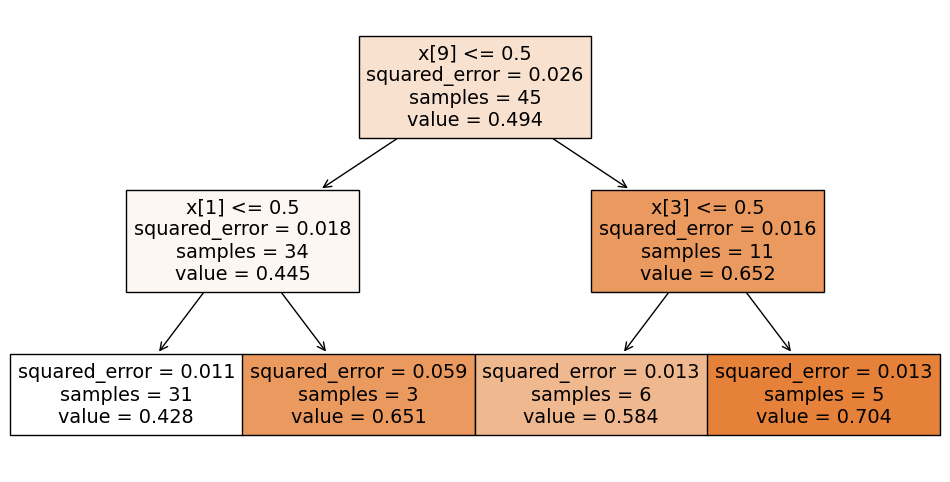

In [44]:
# random forest model
rf_model = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                                max_depth = best_params['max_depth'],
                                min_samples_split = best_params['min_samples_split'],
                                min_samples_leaf = best_params['min_samples_leaf'],
                                random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plt.title("Decision Tree")
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

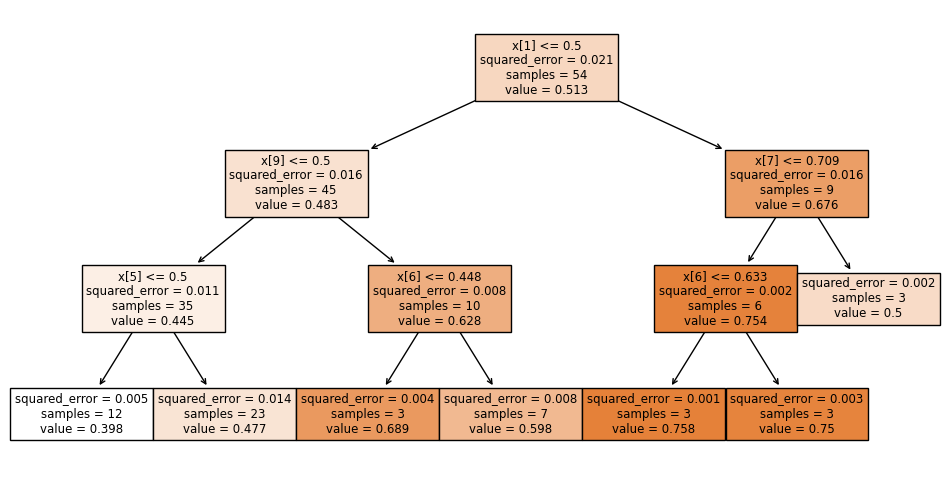

In [45]:
# Initialize the random forest model - whole data
rf_model = RandomForestRegressor(n_estimators = 30,
                                max_depth = 3,
                                min_samples_split = 3,
                                min_samples_leaf = 3,
                                random_state = 42)

# Train the model on the data
rf_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plt.title("Decision Tree")
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()